<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Regresi%C3%B3n%20Log%C3%ADstica/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

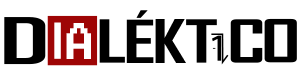

**INTRODUCCIÓN A LA REGRESIÓN LOGÍSTICA 📊**

# 1. Introducción

En esta práctica elaboraremos un modelo de **clasificación** aplicando una **regresión logística** a un conjunto datos de **Spotify**. Con ello podrás experimentar las diferencias entre algoritmos de **regresión** y **clasificación**, así como aprender la forma en que se ensamblan y operan este tipo de modelos en un entorno de programación.

# 2. Objetivo

Se plantea el siguiente caso: se nos ha entregado un conjunto de datos de canciones obtenido directamente de la base de datos de **Spotify**, el cual consta de 500 elementos con las siguientes **características** de cada pista: bailabilidad, energía,	acústica,	duración,	instrumentalidad,	sonoridad,	tempo,	discursividad, y género.
Estas métricas son creaciones propias de la compañía, y el equipo de ingeniería desea saber específicamente si los valores de las variables **bailabilidad** y **energía** son significativas al grado de poder ser un factor de diferenciación entre distintos géneros musicales.


Las tareas a realizar son las siguientes:


*  Elaborar un **modelo** de **machine learning** que pueda clasificar canciones en los géneros **black metal** y **reggaeton** de acuerdo con su grado de bailabilidad, y mostrar cuál es valor del límite de decisión.
*  Crear un modelo que, dado el valor de bailabilidad y energía de una canción, logre clasificar canciones en los mismos dos géneros.
*  Crear modelo idéntico al segundo, pero añadiendo el género **salsa** a las clases.


**Nota:** la bailabilidad está definida como qué tan **bailable** es una canción respecto a algunos elementos como tempo, estabilidad del ritmo, fuerza del ritmo, entre otros. La **energía**, por otro lado, es una medida perceptiva de intensidad y actividad en la canción. Como se ha mencionado, estas son métricas reales inventadas por Spotify, para más contexto sobre el conjunto de datos y sus atributos, revísese el **apéndice** al final.

# 3. Carga y exploración de datos

Comenzaremos explorando el conjunto de datos, el cual se extraerá desde un repositorio de [GitHub](https://github.com/DanielDialektico/Machine-Learning/tree/main); además, cargaremos las librerías necesarias para nuestro espacio de trabajo.

In [ ]:
# Se cargan las librerías
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import warnings

# Se filtran las advertencias.
warnings.filterwarnings('ignore')

# Se define el estilo de las gráficas.
plt.style.use('seaborn-v0_8-whitegrid')

# Se carga el conjunto de datos desde un repositorio de GitHub.
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Conjuntos%20de%20datos/Spotify_genres.csv')

# Se imprime el conjunto de datos.
dataset

,Nombre,Bailabilidad,Energía,Acústica,Duración (ms),Instrumentalidad,Sonoridad,Tempo,Discursividad,Género
0,Oceans (Where Feet May Fail),0.262,0.361,0.508000,535963,0.002680,-10.187,126.786,0.0333,world-music
1,What A Beautiful Name,0.424,0.506,0.201000,238200,0.000000,-5.877,135.902,0.0284,world-music
2,So Will I (100 Billion X),0.431,0.416,0.046200,411000,0.000002,-10.376,127.964,0.0296,world-music
3,God Only Knows,0.597,0.417,0.395000,229760,0.000008,-7.952,143.839,0.0502,world-music
4,Who You Say I Am - Studio Version,0.376,0.650,0.004060,198705,0.000000,-8.147,171.907,0.0406,world-music
...,...,...,...,...,...,...,...,...,...,...
495,Blue Monday,0.589,0.696,0.000087,267000,0.000034,-8.109,129.833,0.0340,electronic
496,Praise You - Radio Edit,0.621,0.885,0.041800,227973,0.492000,-6.826,109.728,0.0473,electronic
497,#3,0.159,0.071,0.911000,464293,0.856000,-27.109,146.977,0.0409,electronic
498,Coming Back (feat. SZA),0.653,0.496,0.625000,195905,0.274000,-7.262,86.013,0.0868,electronic


Para una exploración más detallada, procederemos a mostrar algunas estadísticas y resúmenes sobre los datos utilizando las funciones describe() e info() de [Pandas](https://pandas.pydata.org/):

In [ ]:
# Se imprimen estadísticas de cada variable.
dataset.describe()

,Bailabilidad,Energía,Acústica,Duración (ms),Instrumentalidad,Sonoridad,Tempo,Discursividad
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.626770,0.664207,0.227265,230351.806000,0.070762,-6.642706,121.479746,0.090544
std,0.183871,0.177095,0.245249,76522.269259,0.212675,3.149834,28.625996,0.082288
min,0.100000,0.022300,0.000002,87467.000000,0.000000,-30.016000,54.669000,0.025400
25%,0.511750,0.556250,0.019475,180930.000000,0.000000,-8.118500,96.989500,0.039275
50%,0.643500,0.682500,0.130000,210973.000000,0.000008,-6.133500,120.018000,0.055900
75%,0.784500,0.796250,0.396250,262120.250000,0.000991,-4.417500,139.371750,0.106000
max,0.964000,0.991000,0.996000,626880.000000,0.951000,-1.215000,196.120000,0.530000


In [ ]:
# Se imprime información sobre tipos de datos de cada variable, entre otras características.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre            500 non-null    object 
 1   Bailabilidad      500 non-null    float64
 2   Energía           500 non-null    float64
 3   Acústica          500 non-null    float64
 4   Duración (ms)     500 non-null    int64  
 5   Instrumentalidad  500 non-null    float64
 6   Sonoridad         500 non-null    float64
 7   Tempo             500 non-null    float64
 8   Discursividad     500 non-null    float64
 9   Género            500 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 39.2+ KB


A partir de esto, podemos inferir que cada **atributo** tiene sus tipos de datos correctamente definidos, y no contamos con valores nulos. Sin embargo, aún hacen falta algunas adecuaciones.

# 4. Preprocesamiento de datos

Una vez realizada la breve **exploración** de los datos, procedemos a ejecutar las etapas de **preprocesamiento**, que serán las siguientes:

*   **Limpieza de datos**: se delimitará el conjunto de datos solo a los atributos de interés (bailabilidad y energía) eliminando las columnas sobrantes; se tomarán solo los renglones etiquetados con los géneros a utilizar (black metal, reggaeton y salsa), y por último se removerán las canciones repetidas. 
*   **Transformación de datos**: se transformará la variable categórica "Género" a tipo numérico.


## 4.1 Limpieza y transformación del conjunto de datos 

Comenzaremos el preprocesamiento tomando solo las **columnas** correspondientes a las **variables** que deseamos procesar como características de entrada para el modelo:

In [ ]:
# Se filtran solo las columnas deseadas.
reduc_dataset = dataset.iloc[0:,[0,1,2,-1]]

# Se imprime el conjunto de datos.
reduc_dataset

,Nombre,Bailabilidad,Energía,Género
0,Oceans (Where Feet May Fail),0.262,0.361,world-music
1,What A Beautiful Name,0.424,0.506,world-music
2,So Will I (100 Billion X),0.431,0.416,world-music
3,God Only Knows,0.597,0.417,world-music
4,Who You Say I Am - Studio Version,0.376,0.650,world-music
...,...,...,...,...
495,Blue Monday,0.589,0.696,electronic
496,Praise You - Radio Edit,0.621,0.885,electronic
497,#3,0.159,0.071,electronic
498,Coming Back (feat. SZA),0.653,0.496,electronic


Ahora seleccionamos solo los renglones que correspondan a **canciones** de los **géneros** que utilizaremos para alimentar al modelo:

In [ ]:
# Se seleccionan los renglones correspondientes a los géneros elegidos.
filt_dataset = reduc_dataset.loc[reduc_dataset.iloc[:, -1].isin(["black-metal", "salsa", "reggaeton"])]

# Se imprime el conjunto de datos.
filt_dataset

,Nombre,Bailabilidad,Energía,Género
50,Vivir Mi Vida,0.656,0.877,salsa
51,Llorarás,0.704,0.884,salsa
52,Suavemente,0.811,0.880,salsa
53,Ven Devórame Otra Vez,0.643,0.602,salsa
54,Yo No Sé Mañana,0.653,0.827,salsa
...,...,...,...,...
345,Deathcrush,0.219,0.908,black-metal
346,FTBS,0.265,0.912,black-metal
347,Stress Builds Character,0.286,0.780,black-metal
348,Fear of Failure,0.246,0.924,black-metal


Ahora, en caso de existir, removemos las canciones repetidas:

In [ ]:
# Se eliminan las canciones repetidas.
prep_dataset = filt_dataset.drop_duplicates(subset=['Nombre']).reset_index(drop = True)

# Se imprime el conjunto de datos.
prep_dataset

,Nombre,Bailabilidad,Energía,Género
0,Vivir Mi Vida,0.656,0.877,salsa
1,Llorarás,0.704,0.884,salsa
2,Suavemente,0.811,0.880,salsa
3,Ven Devórame Otra Vez,0.643,0.602,salsa
4,Yo No Sé Mañana,0.653,0.827,salsa
...,...,...,...,...
134,Deathcrush,0.219,0.908,black-metal
135,FTBS,0.265,0.912,black-metal
136,Stress Builds Character,0.286,0.780,black-metal
137,Fear of Failure,0.246,0.924,black-metal


El resultado final es una tabla con **139 renglones** y **4 columnas**, por lo que se puede inferir que se han removido 11 canciones repetidas (aprox. un 8% del total). 


Hecho esto solo queda la transformación de la variable "Género" a una variable numérica **discreta**, para lo cual utilizaremos la clase **labelEncoder()** de la librería sklearn:

In [ ]:
#Se codifica la variable género en cantidades discretas.
label_encoder = preprocessing.LabelEncoder()
prep_dataset['Género'] = label_encoder.fit_transform(prep_dataset['Género'])

# Se imprime el conjunto de datos.
prep_dataset

,Nombre,Bailabilidad,Energía,Género
0,Vivir Mi Vida,0.656,0.877,2
1,Llorarás,0.704,0.884,2
2,Suavemente,0.811,0.880,2
3,Ven Devórame Otra Vez,0.643,0.602,2
4,Yo No Sé Mañana,0.653,0.827,2
...,...,...,...,...
134,Deathcrush,0.219,0.908,0
135,FTBS,0.265,0.912,0
136,Stress Builds Character,0.286,0.780,0
137,Fear of Failure,0.246,0.924,0


Podemos notar cómo se realizaron las siguientes conversiones para cada salida de la variable Género:

*   Black metal = 0
*   Reggaeton = 1
*   Salsa = 2



Nótese que, a diferencia de cómo trabajamos el caso en nuestra exploración de la regresión logística, aquí las **probabilidades condicionales** se van a calcular en relación al género **reggaeton**, ya que se le asignó el número 1, lo cual no afecta a los resultados ni el objetivo del modelo. 

Con esto concluye la etapa de **preprocesamiento** y pasamos a confeccionar el primer **modelo**.

# 5. Regresión logística univariable

El primer modelo que elaboraremos será el que clasifique canciones en las clases **black metal** y **reggaeton** de acuerdo con su **bailabilidad**, por lo que solo considerará una **variable** independiente (un atributo) y dos categorías (dos posibles valores de la variable dependiente). Para esto haremos uso de la clase **LogisticRegression(**) de sklearn.

Primero seleccionaremos solo los datos correspondientes a estos dos géneros, y realizamos la división del conjunto en los subconjuntos de **entrenamiento** y **prueba**.

In [ ]:
# Se seleccionan los renglones correspondientes a los géneros black metal y reggaeton
mod1_dataset = prep_dataset.loc[prep_dataset['Género'].isin([0, 1])]

# Se generan los conjuntos de entrenamiento y prueba.
inputs = mod1_dataset['Bailabilidad']
outputs = mod1_dataset['Género']
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

Ahora **entrenamos** el modelo utilizando la **regresión logística** y graficamos el modelo resultante:

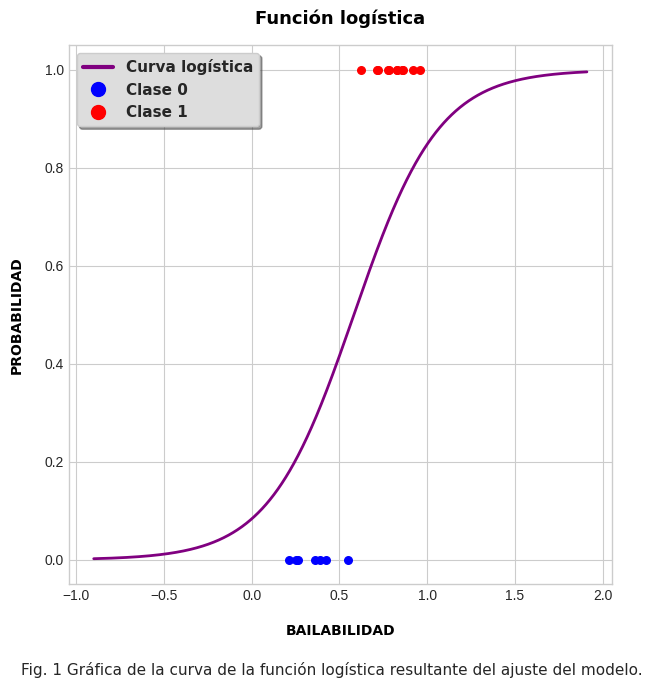

In [ ]:
x_train = x_train.to_numpy().reshape(-1,1)

# Se entrena el modelo.
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train.values.ravel())

#-------------Gráfica---------------
# Se crea un rango de valores para el eje x.
x_range= np.linspace(x_train.min() - 1, x_train.max() + 1, 1000)

# Se calculan los valores correspondientes al eje y para la curva de la función logística.
logistic_curve = logisticRegr.predict_proba(x_range.reshape(-1, 1))[:, 1]

# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafican los puntos de las dos clases del conjunto de entrenamiento.
plt.scatter(x_test[y_test == 0], y_test[y_test == 0], color='blue', s = 30)
plt.scatter(x_test[y_test == 1], y_test[y_test == 1], color='red', s = 30)

# Se grafica la curva de la función logística.
plt.plot(x_range, logistic_curve, color='purple', label='Curva logística', linewidth=2)

# Se definen las leyendas de la gráfica.
function = mlines.Line2D([], [], color='purple', linewidth=3, label='Curva logística')
class_0 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Clase 0')
class_1 = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Clase 1')

# Se configuran las características de las leyendas.
plt.legend(handles=[function, class_0, class_1], loc='upper left', prop={'family': 'DejaVu Sans', 'weight': 'bold', 'size': 11}, frameon=True, framealpha=1, facecolor='#dddddd', shadow=True)

# Se añaden títulos e información adicional.
plt.title("Función logística", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 13}, pad = 15)
plt.xlabel("BAILABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 15)
plt.ylabel("PROBABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 15)
plt.suptitle("Fig. 1 Gráfica de la curva de la función logística resultante del ajuste del modelo.", fontproperties = {'family': 'DejaVu Sans', 'size': 11}, y=-0.001)

plt.show()

Recordemos que está curva está dada por el siguiente modelo:

\begin{align}
        p(y=1|x,\theta)=\frac{1}{1+e^{-(\theta_{0}+\theta_{1}x)}}\:.\tag{1.1}
    \end{align}

Una vez ajustado el modelo, evaluamos su **precisión** (**accuracy**), la cual se da mediante la siguiente razón:

\begin{align}
        \mathrm{accuracy} = \frac{\mathrm{Predicciones\:correctas}}{\mathrm{Total\:de\:predicciones}}\:.\tag{1.2}
    \end{align}

Lo calculamos como sigue e imprimimos su valor:

In [ ]:
# Se calcula e imprime el valor de la precisión del modelo.
score = logisticRegr.score(x_test.to_numpy().reshape(-1,1), y_test.values.ravel())

print("La precisión del modelo es: " + str(score))

La precisión del modelo es: 1.0


La razón obtenida debería ser 1 (o muy cercana 1), lo cual quiere decir que el modelo acierta en el 100% (o aproximadamente el 100%) de las observaciones del conjunto de prueba.

**Nota:** la precisión es solo una de varias medidas disponibles para la evaluación del modelo; hablaremos sobre ello en próximas exploraciones.

## 5.1 Límite de decisión

Ahora exploremos brevemente el **límite de decisión**. Recordemos que este nos indica el **umbral** que determina si una observación pertenece o no a una clase determinada, y está dada por la siguiente ecuación:



\begin{align}
        b_{dec}=-\frac{\theta_0}{\theta_1}\:.\tag{1.3} 
    \end{align}

donde $\theta_0$ y $\theta_1$ son los parámetros de la **función sigmoide**.

Para obtener el valor del límite de decisión extraemos el valor de los parámetros de la función y realizamos la división correspondiente:

In [ ]:
# Se extraen los valores de los parámetros del modelo.
theta_0 = logisticRegr.coef_[0]
theta_1 = logisticRegr.intercept_

# Se realiza la división y se imprime el resultado.
decision_b  = -theta_1 / theta_0
print('El valor del límite de decisión es aproximadamente:\n' + str(decision_b[0])[0:4])

El valor del límite de decisión es aproximadamente:
0.58


Graficamos el límite:

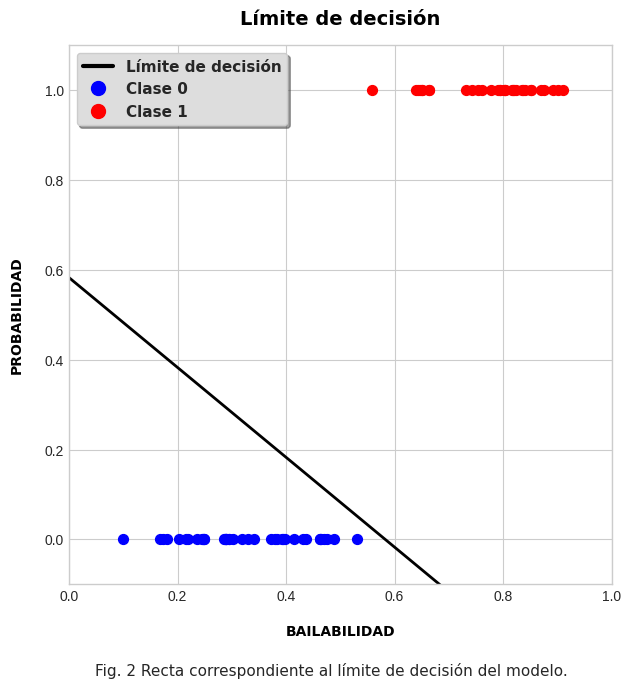

In [ ]:
# Se crea un rango de valores para el eje x.
x_values = np.linspace(x_train.min() - 1, x_train.max() + 1, 1000)

# Se calculan los valores correspondientes en el eje y
y_values = -(theta_1 + theta_0*x_values)/theta_0

# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafican los puntos de las dos clases del conjunto de entrenamiento.
plt.scatter(x_train[y_train == 0], y_train[y_train == 0], color='blue', s = 50)
plt.scatter(x_train[y_train == 1], y_train[y_train == 1], color='red', s = 50)

# Se grafica la recta correspondiente al límite de decisión.
plt.plot(x_values, y_values, color='black', linewidth = 2)

# Se definen las leyendas de la gráfica.
line = mlines.Line2D([], [], color='black', linewidth=3, label='Límite de decisión')
red_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Clase 0')
blue_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Clase 1')

# Se configuran las características de las leyendas.
plt.legend(handles=[line, red_circle, blue_circle], loc='upper left', prop={'family': 'DejaVu Sans', 'weight': 'bold', 'size': 11}, frameon=True, framealpha=1, facecolor='#dddddd', shadow=True)

# Se añaden títulos e información adicional.
plt.title("Límite de decisión", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
plt.xlabel("BAILABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 15)
plt.ylabel("PROBABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 15)
plt.suptitle("Fig. 2 Recta correspondiente al límite de decisión del modelo.", fontproperties = {'family': 'DejaVu Sans', 'size': 11}, y=-0.001)

# Se limitan los ejes de la gráfica.
plt.ylim(-0.1, 1.1)
plt.xlim(0, 1)

plt.show()

## 5.2 Utilizando el modelo

Ahora utilizaremos el modelo para calcular la **probabilidad** y **clase** de la canción **FTBS**, la cual tiene una **bailabilidad** de **0.265**. 

En el siguiente bloque se calcula la probabilidad de que esta pertenezca a la clase **reggaeton**, es decir, a la **clase 1**.

In [ ]:
prob = logisticRegr.predict_proba(np.array(0.265).reshape(-1,1))
print('La probabilidad de que la canción pertenezca a la clase 1 es:\n' + str(prob[0][1])[0:4])

La probabilidad de que la canción pertenezca a la clase 1 es:
0.21


Esta predicción de probabilidad se puede visualizar sobre la curva del modelo en la **figura 3**:

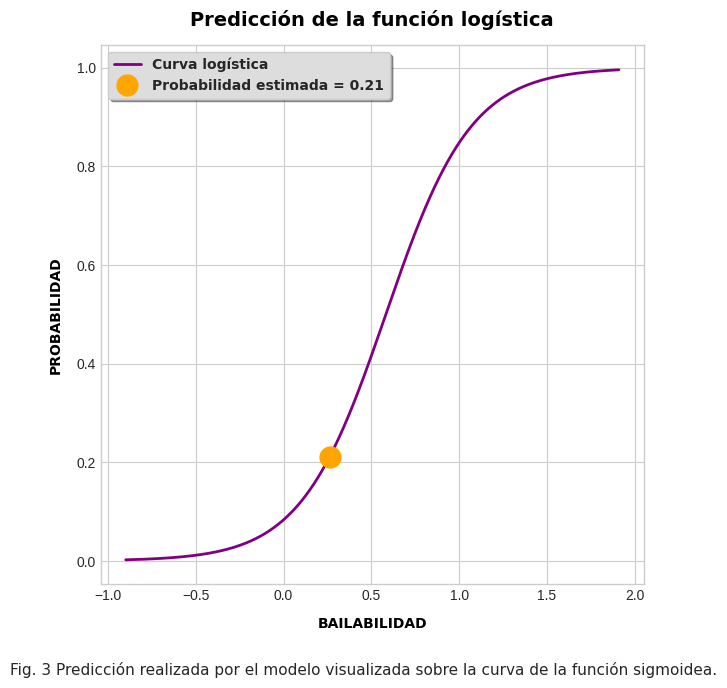

In [ ]:
# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafica la curva de la función logística.
plt.plot(x_range, logistic_curve, color='purple', label='Curva logística', linewidth=2)
plt.plot(0.265, 0.21, 'o', markersize = 15, color="orange", label = 'Probabilidad estimada = ' + str(prob[0][1])[0:4])

# Se configuran las características de las leyendas.
plt.legend(loc='upper left', prop = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 10}, frameon = True, framealpha = 1, facecolor  = '#dddddd', shadow = True)

# Se añaden títulos e información adicional.
plt.title("Predicción de la función logística", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 14)
plt.xlabel("BAILABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.ylabel("PROBABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.suptitle("Fig. 3 Predicción realizada por el modelo visualizada sobre la curva de la función sigmoidea.", fontproperties = {'family': 'DejaVu Sans', 'size': 11}, y=-0.001)

plt.show()

Ahora que hemos calculado esta probabilidad, revisamos cuál es la **categoría** asignada por el algoritmo utilizando el método **predict()**:

In [ ]:
predict_class = logisticRegr.predict(np.array(0.265).reshape(-1,1))[0]
print('La clase estimada para la canción es:\n' + str(predict_class))

La clase estimada para la canción es:
0


Dado que la clase 0 es **black metal**, concluimos que esta pista se atribuye a tal categoría.

# 6. Regresión logística multivariable

La siguiente tarea a realizar es crear un modelo que haga las mismas clasificaciones, pero tomando en cuenta dos variables independientes: **bailabilidad** y **energía**. Por lo que se está hablando de una regresión logística multivariable.

En el siguiente fragmento se ajustará el modelo para ambas variables y se imprimirá su **precisión** de predicción.

In [ ]:
# Se seleccionan las variables y se generan los conjuntos de entrenamiento y prueba.
inputs = mod1_dataset[['Bailabilidad','Energía']]
outputs = mod1_dataset['Género']
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Se entrena el modelo.
logisticRegr.fit(x_train, y_train)

# Se calcula e imprime el valor de la precisión del modelo.
y_pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print("La precisión del modelo es: " + str(score))

La precisión del modelo es: 1.0


Podemos observar que la **precisión** del modelo es también del 100%; esto es porque ambas variables son linealmente separables en su totalidad, lo cual se puede constatar en la **figura 4**:

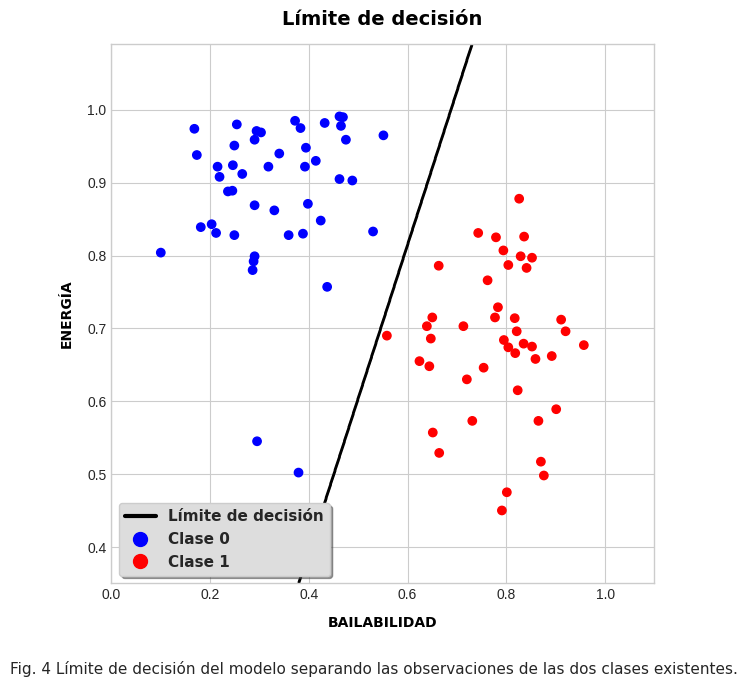

In [ ]:
# Se crea una malla de puntos en el plano.
x_min, x_max = mod1_dataset['Bailabilidad'].min() - 0.1, mod1_dataset['Bailabilidad'].max() + 0.1
y_min, y_max = mod1_dataset['Energía'].min() - 0.1, mod1_dataset['Energía'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, 1.1, 0.001),
                     np.arange(y_min, 1.09, 0.001))

# Se obtienen las etiquetas para cada punto.
labels = mod1_dataset['Género']

# Se predicen las etiquetas de los puntos en la malla.
Z = logisticRegr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Se crea una lista de colores para cada punto.
colors = ['blue' if label == 0 else 'red' for label in labels]

# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafican los puntos y el límite de decisión.
plt.scatter(mod1_dataset['Bailabilidad'], mod1_dataset['Energía'], c=colors)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)

# Se definen las leyendas de la gráfica.
line = mlines.Line2D([], [], color='black', linewidth=3, label='Límite de decisión')
red_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Clase 0')
blue_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Clase 1')

# Se configuran las características de las leyendas.
plt.legend(handles=[line, red_circle, blue_circle], loc='lower left', prop={'family': 'DejaVu Sans', 'weight': 'bold', 'size': 11}, frameon=True, framealpha=1, facecolor='#dddddd', shadow=True)

# Se añaden títulos e información adicional.
plt.title("Límite de decisión", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 14)
plt.xlabel("BAILABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.ylabel("ENERGÍA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.suptitle("Fig. 4 Límite de decisión del modelo separando las observaciones de las dos clases existentes.", fontproperties = {'family': 'DejaVu Sans', 'size': 11}, y=-0.001)

plt.show()

La recta en la gráfica **separa** de forma consistente las dos clases de datos, lo cual demuestra que las variables **energía** y **bailabilidad** marcan una diferenciación muy precisa entre canciones de ambos géneros.

# 7. Regresión logística multivariable multiclase

Por último se creará un modelo idéntico, con la diferencia de que se añadirá una **clase** **extra**: el género **salsa**.

Para esto volveremos a utilizar el conjunto de datos que resultó del preprocesamiento. Parta la clasificación final, la librería sklearn utiliza la función **softmax** en la definición de la pertenencia de los datos a las distintas clases. Este método será discutido en expediciones próximas.

Entrenamos el modelo con tres clases e imprimimos su precisión:

In [ ]:
# Se generan los conjuntos de entrenamiento y prueba.
inputs = prep_dataset[['Bailabilidad','Energía']]
outputs = prep_dataset['Género']
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

#Se entrena el modelo.
logisticRegr.fit(x_train, y_train)

# Se calcula e imprime el valor de la precisión del modelo.
y_pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print("La precisión del modelo es: " + str(score))

La precisión del modelo es: 0.75


Notaremos que el modelo tiene una precisión considerablemente más baja, lo cual puede ser porque las observaciones añadidas no son tan seperables como en el caso anterior.

Una forma de visualizar esto es la que se muestra en la **figura 5**:

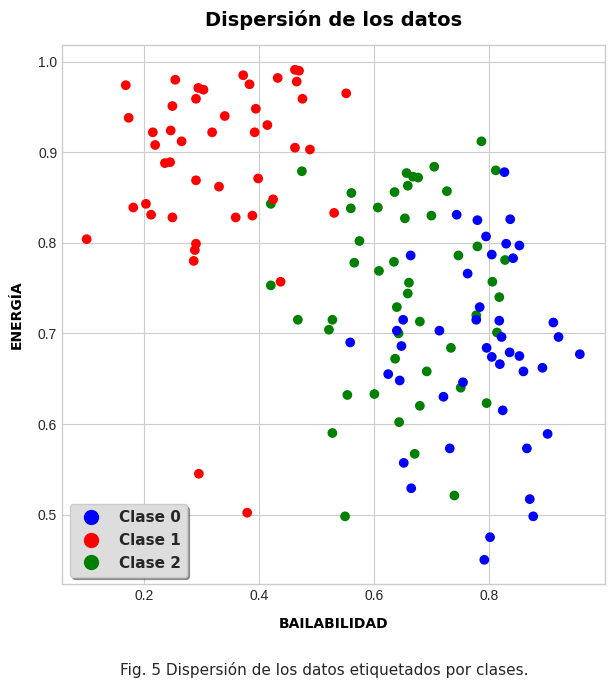

In [ ]:
# Se crea una malla de puntos en el plano.
x_min, x_max = prep_dataset['Bailabilidad'].min() - 0.1, prep_dataset['Bailabilidad'].max() + 0.1
y_min, y_max = prep_dataset['Energía'].min() - 0.1, prep_dataset['Energía'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, 1.1, 0.001),
                     np.arange(y_min, 1.09, 0.001))

# Se obtienen las etiquetas para cada punto.
labels = prep_dataset['Género']

# Se predicen las etiquetas de los puntos en la malla.
Z = logisticRegr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Se crea una lista de colores para cada punto.
colors = ['red' if label == 0 else 'blue' if label == 1 else 'green' if label == 2 else 'black' for label in labels]

# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafican los puntos y el límite de decisión.
plt.scatter(prep_dataset['Bailabilidad'], prep_dataset['Energía'], c=colors)

# Se definen las leyendas de la gráfica.
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Clase 0')
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Clase 1')
yellow_circle = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Clase 2')

# Se configuran las características de las leyendas.
plt.legend(handles=[blue_circle, red_circle, yellow_circle], loc='lower left', prop={'family': 'DejaVu Sans', 'weight': 'bold', 'size': 11}, frameon=True, framealpha=1, facecolor='#dddddd', shadow=True)

#Se añaden títulos e información adicional.
plt.title("Dispersión de los datos", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 14)
plt.xlabel("BAILABILIDAD", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.ylabel("ENERGÍA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.suptitle("Fig. 5 Dispersión de los datos etiquetados por clases.", fontproperties = {'family': 'DejaVu Sans', 'size': 11}, y=-0.001)

plt.show()

Se puede constatar que a pesar de que los puntos pertenecientes a la **clase 1** y la **clase 2** tienen una separación marcada, los ejemplos de entrenamiento de la **clase 0** y la **clase 2** se mezclan un poco más, generando una precisión más baja del modelo. Esto se puede explicar por **similitudes** en las canciones respecto a las métricas seleccionadas.

Sin embargo, los resultados de los tres modelos apuntan a que las métricas involucradas pueden ser marcadores efectivos de **diferenciación** entre canciones de diferentes **géneros musicales**. Para crear modelos multicaclase con mayor precisión se pueden sumar otras variables, o incluso utilizar un modelos de clasificación diferentes.

Ahora puedes experimentar con distintas combinaciones de **clases** y **métricas** para el entrenamiento del modelo con regresión logística

# 8. Ejercicio (opcional)

Por último, tienes la oportunidad de elegir las **clases** y **métricas** que gustes para el entrenamiento del modelo. Recuerda que puedes elegir entre las siguientes características (sin contar Nombre y Género): 

In [ ]:
# Se imprimen las características del conjunto de datos.
dataset.columns.tolist()

['Nombre',
 'Bailabilidad',
 'Energía',
 'Acústica',
 'Duración (ms)',
 'Instrumentalidad',
 'Sonoridad',
 'Tempo',
 'Discursividad',
 'Género']

Y las siguientes clases:

In [ ]:
# Se imprimen los géneros disponibles.
dataset['Género'].unique().tolist()

['world-music',
 'salsa',
 'rock-n-roll',
 'reggae',
 'reggaeton',
 'pop',
 'black-metal',
 'k-pop',
 'hip-hop',
 'electronic']

Modifica el siguiente fragmento con tus elecciones (no olvides colocar el texto entre comillas simples o dobles):

In [ ]:
# Se carga el conjunt de datos.
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Conjuntos%20de%20datos/Spotify_genres.csv')

# Se eligen dos atributos.
attribute_1 = #Escribe tu elección.
attribute_2 = #Escribe tu elección.

# Se eligen dos géneros.
genre_1 = #Escribe tu elección.
genre_2 = #Escribe tu elección.

# Se preprocesa el conjunto de datos.
dataset = dataset.loc[:, ['Nombre', attribute_1, attribute_2, 'Género']]
dataset = dataset.loc[dataset.iloc[:, -1].isin([genre_1, genre_2])]
dataset = dataset.drop_duplicates(subset=['Nombre']).reset_index(drop = True)
dataset['Género'] = label_encoder.fit_transform(dataset['Género'])

dataset

,Nombre,Tempo,Instrumentalidad,Género
0,TQG,179.974,0.000000,1
1,Me Porto Bonito,92.005,0.000027,1
2,Tití Me Preguntó,106.672,0.000291,1
3,Chanel,132.005,0.003170,1
4,Classy 101,100.065,0.000000,1
...,...,...,...,...
86,Deathcrush,121.476,0.933000,0
87,FTBS,94.248,0.180000,0
88,Stress Builds Character,80.705,0.038600,0
89,Fear of Failure,149.851,0.072300,0


Ahora entrena tu modelo ejecutando el siguiente fragmento sin hacer modificaciones al código, y observa el valor de su precisión:

In [ ]:
# Se generan los conjuntos de entrenamiento y prueba.
inputs = dataset[[attribute_1, attribute_2]]
outputs = dataset['Género']
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

#Se entrena el modelo.
logisticRegr.fit(x_train, y_train)

#Se calcula e imprime la precisión del modelo.
y_pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

print("La precisión del modelo es: " + str(score))

La precisión del modelo es: 0.7894736842105263


Por último, indaga en cómo luce la separación de clases ejecutando la siguiente celda:

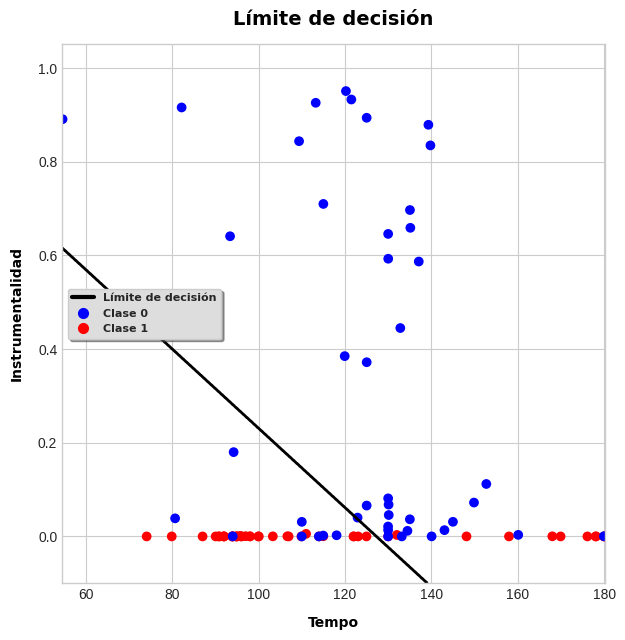

In [ ]:
# Se crea una malla de puntos en el plano.
x_min, x_max = dataset[attribute_1].min() - 0.1, dataset[attribute_1].max() + 0.1
y_min, y_max = dataset[attribute_2].min() - 0.1, dataset[attribute_2].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 2000), np.linspace(y_min, y_max, 2000))

# Se obtienen las etiquetas para cada punto.
labels = dataset['Género']

# Se predicen las etiquetas de los puntos en la malla.
Z = logisticRegr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Se crea una lista de colores para cada punto.
colors = ['blue' if label == 0 else 'red' for label in labels]

# Se define el tamaño de la gráfica.
plt.figure(figsize=(7, 7))

# Se grafican los puntos y el límite de decisión.
plt.scatter(dataset[attribute_1], dataset[attribute_2], c=colors)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)

# Se definen las leyendas de la gráfica.
line1 = mlines.Line2D([], [], color='black', linewidth=3, label='Límite de decisión')
red_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=7, label='Clase 0')
blue_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=7, label='Clase 1')

# Se configuran las características de las leyendas.
plt.legend(handles=[line1, red_circle, blue_circle], loc='center left', prop={'family': 'DejaVu Sans', 'weight': 'bold', 'size': 8}, frameon=True, framealpha=1, facecolor='#dddddd', shadow=True)

# Se añaden títulos e información adicional.
plt.title("Límite de decisión", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 14)
plt.xlabel(attribute_1, fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)
plt.ylabel(attribute_2, fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad = 10)

plt.show()

¿Cuáles han sido tus resultados?, ¿encontraste alguna combinación linealmente separable? Compártenos tus resultados en los comentarios de la lección.

Con este ejercicio concluye esta práctica de regresión logística, recomiendo que tomes tu tiempo haciendo tus propios experimentos en el último apartado.

▶ [Regresar a la lección](https://dialektico.com/regresion-logistica-fundamentos/) 🧙

# 9. Apéndice

## 9.1 Conjunto de datos

Este conjunto de datos fue extraído por **Dialéktico** utilizando la **API** de **Spotify**, consta de 500 canciones y 9 atributos:

**Género**: género musical al que pertenece la canción.

**Nombre**: nombre de la canción.

**Acústica**: medida de confianza de 0,0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

**Bailabilidad**: la capacidad de baile describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0,0 es menos bailable y 1.0 es más bailable.

**Duración (ms)**: duración de la pista en milisegundos.

**Energía**: medida de 0.0 a 1.0 que representa un grado perceptivo de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la tasa de inicio y la entropía general.

**Instrumentalidad**: predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.

**Sonoridad**: volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. El volumen es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

**Tempo**: el tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.

**Discursividad**: detecta la presencia de palabras habladas en una pista. Cuanto más se parece exclusivamente al habla la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1.0 es el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente estén formadas en su totalidad por palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0.33 probablemente representen música y otras pistas que no sean de voz.